Importowanie bibliotek i wczytanie danych

In [ ]:
# Importowanie niezbędnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienie stylu wykresów
sns.set(style='whitegrid', palette='deep')
%matplotlib inline

# Wczytanie oczyszczonego zestawu danych
df = pd.read_csv('data/cleaned_data.csv')

# Wyświetlenie pierwszych 5 wierszy
df.head()

Podstawowa analiza danych

In [ ]:
# Informacje o danych
df.info()

Statystyki opisowe

In [ ]:
# Statystyki opisowe dla zmiennych numerycznych
df.describe()

Sprawdzenie brakujących wartości

In [ ]:
# Sprawdzenie brakujących wartości
df.isnull().sum()

Analiza zmiennej docelowej (Rent)

In [ ]:
# Histogram rozkładu czynszu
plt.figure(figsize=(10,6))
sns.histplot(df['Rent'], bins=50, kde=True)
plt.title('Rozkład czynszu')
plt.xlabel('Czynsz (INR)')
plt.ylabel('Liczba nieruchomości')
plt.show()

# Statystyki zmiennej 'Rent'
print(df['Rent'].describe())

# Transformacja logarytmiczna zmiennej 'Rent'
df['Rent_Log'] = np.log1p(df['Rent'])

# Histogram rozkładu logarytmicznego czynszu
plt.figure(figsize=(10,6))
sns.histplot(df['Rent_Log'], bins=50, kde=True)
plt.title('Rozkład logarytmiczny czynszu')
plt.xlabel('Log(Czynsz)')
plt.ylabel('Liczba nieruchomości')
plt.show()

Analiza cech numerycznych

In [ ]:
# Lista cech numerycznych
numeric_features = ['Size', 'Floor Level', 'Total Floors', 'BHK', 'Bathroom']

# Statystyki opisowe cech numerycznych
df[numeric_features].describe()

# Wykresy rozkładów
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Rozkład cechy {feature}')
    plt.xlabel(feature)
    plt.ylabel('Liczba nieruchomości')
    plt.show()
    
# Wykresy zależności
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=feature, y='Rent', data=df)
    plt.title(f'{feature} vs Czynsz')
    plt.xlabel(feature)
    plt.ylabel('Czynsz (INR)')
    plt.show()

Analiza cech kategorycznych

Kolumna City

In [ ]:
# Lista kolumn dotyczących miasta
city_columns = [col for col in df.columns if 'City_' in col]

# Odtworzenie kolumny 'City'
def get_city(row):
    for col in city_columns:
        if row[col] == 1:
            return col.replace('City_', '')
    return 'Other'

df['City'] = df.apply(get_city, axis=1)

Kolumna Furnishing Status

In [ ]:
# Lista kolumn dotyczących stanu umeblowania
furnishing_columns = [col for col in df.columns if 'Furnishing Status_' in col]

# Odtworzenie kolumny 'Furnishing Status'
def get_furnishing_status(row):
    for col in furnishing_columns:
        if row[col] == 1:
            return col.replace('Furnishing Status_', '')
    return 'Furnished'  # Zakładamy, że 'Furnished' zostało usunięte przez 'drop_first=True'

df['Furnishing Status'] = df.apply(get_furnishing_status, axis=1)

Kolumna Tenant Preferred

In [ ]:
# Lista kolumn dotyczących preferencji najemcy
tenant_columns = [col for col in df.columns if 'Tenant Preferred_' in col]

# Odtworzenie kolumny 'Tenant Preferred'
def get_tenant_preferred(row):
    for col in tenant_columns:
        if row[col] == 1:
            return col.replace('Tenant Preferred_', '')
    return 'Bachelors'  # Zakładamy, że 'Bachelors' zostało usunięte przez 'drop_first=True'

df['Tenant Preferred'] = df.apply(get_tenant_preferred, axis=1)

Analiza wpływu cech kategorycznych na czynsz

Czynsz w zależności od miasta

In [ ]:
plt.figure(figsize=(12,6))

# Skala logarytmiczna dla osi Y
sns.boxplot(x='City', y='Rent', data=df)
plt.yscale('log')

# Tytuły i opisy osi
plt.title('Miasto vs Czynsz (skala logarytmiczna)')
plt.xlabel('Miasto')
plt.ylabel('Czynsz (INR, skala logarytmiczna)')

# Rotacja etykiet na osi X
plt.xticks(rotation=45)

# Ustawienie limitów osi Y dla lepszej czytelności (opcjonalne)
plt.ylim(1000, 1e6)

plt.show()

Czynsz w zależności od stanu umeblowania

In [ ]:
plt.figure(figsize=(8,6))

# Skala logarytmiczna dla osi Y
sns.boxplot(x='Furnishing Status', y='Rent', data=df)
plt.yscale('log')

# Tytuły i opisy osi
plt.title('Stan umeblowania vs Czynsz (skala logarytmiczna)')
plt.xlabel('Stan umeblowania')
plt.ylabel('Czynsz (INR, skala logarytmiczna)')

# Ustawienie limitów osi Y dla lepszej widoczności (opcjonalne)
plt.ylim(1000, 1e6)

plt.show()


Obserwacja: Czynsz wzrasta wraz z poziomem umeblowania nieruchomości – najmniejsze mediany dotyczą mieszkań Unfurnished (12,000 INR), a najwyższe Furnished (27,000 INR). Wyższy standard umeblowania wiąże się z wyraźnie wyższymi kosztami wynajmu.

Czynsz w zależności od preferencji najemcy

In [ ]:
plt.figure(figsize=(10,6))

# Użycie koloru z domyślnym stylem bez `palette`
sns.boxplot(x='Tenant Preferred', y='Rent', data=df, hue='Tenant Preferred', dodge=False)
plt.yscale('log')

# Tytuły i opisy osi
plt.title('Preferencje najemcy vs Czynsz (skala logarytmiczna)', fontsize=14)
plt.xlabel('Preferencje najemcy', fontsize=12)
plt.ylabel('Czynsz (INR, skala logarytmiczna)', fontsize=12)

# Ustawienie limitów osi Y (opcjonalne)
plt.ylim(1000, 1e6)

plt.xticks(rotation=0)
plt.legend([], [], frameon=False)  # Wyłączenie legendy
plt.show()

Obserwacja: Czynsz różni się w zależności od preferencji najemcy. Bachelors/Family płacą najniższe mediany czynszu (15,000 INR), podczas gdy Bachelors (20,000 INR) i Family (25,000 INR) są skłonni zapłacić więcej. Preferencje rodzin są związane z najwyższymi medianami czynszu, co może wskazywać na większe zapotrzebowanie na większe i bardziej komfortowe mieszkania.

Analiza korelacji

In [ ]:
# Obliczenie macierzy korelacji
corr_matrix = numeric_df.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    vmin=-1, vmax=1,  # Zakres korelacji od -1 do 1
    cbar_kws={'shrink': 0.8}  # Dopasowanie rozmiaru paska kolorów
)

# Tytuł i estetyka
plt.title('Macierz korelacji', fontsize=14)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

Obserwacje:
Size, Bathroom, i BHK to kluczowe zmienne wpływające na Rent, szczególnie po logarytmizacji (patrz: Rent_Log).
Wysoka korelacja między Total Floors a Floor Level może wskazywać na zależności strukturalne w budynku.
Niski wpływ piętra (Floor Level) sugeruje, że inne czynniki, takie jak lokalizacja czy standard nieruchomości, mogą mieć większe znaczenie przy ustalaniu czynszu.

Identyfikacja i obsługa wartości odstających

In [ ]:
# Lista cech numerycznych
numeric_features = ['Size', 'Floor Level', 'Total Floors', 'BHK', 'Bathroom', 'Rent']

# Wykresy pudełkowe bez użycia `palette`
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[feature], hue=None)  # Usunięcie `palette`, brak zmiennej `hue`
    plt.title(f'Wykres pudełkowy dla {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Usunięcie wartości odstających

In [ ]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)  # Pierwszy kwartyl
    Q3 = df[feature].quantile(0.75)  # Trzeci kwartyl
    IQR = Q3 - Q1  # Rozstęp międzykwartylowy
    lower_limit = Q1 - 1.5 * IQR  # Dolna granica
    upper_limit = Q3 + 1.5 * IQR  # Górna granica
    return df[(df[feature] >= lower_limit) & (df[feature] <= upper_limit)]

# Usuwanie wartości odstających dla każdej cechy numerycznej
for feature in numeric_features:
    original_len = len(df)
    df = remove_outliers(df, feature)
    print(f'{feature}: Usunięto {original_len - len(df)} wartości odstających.')

# Porównanie rozmiaru zbioru danych przed i po usunięciu wartości odstających
print(f'Rozmiar danych po usunięciu wartości odstających: {len(df)}')

Ponowna analiza po usunięciu wartości odstających

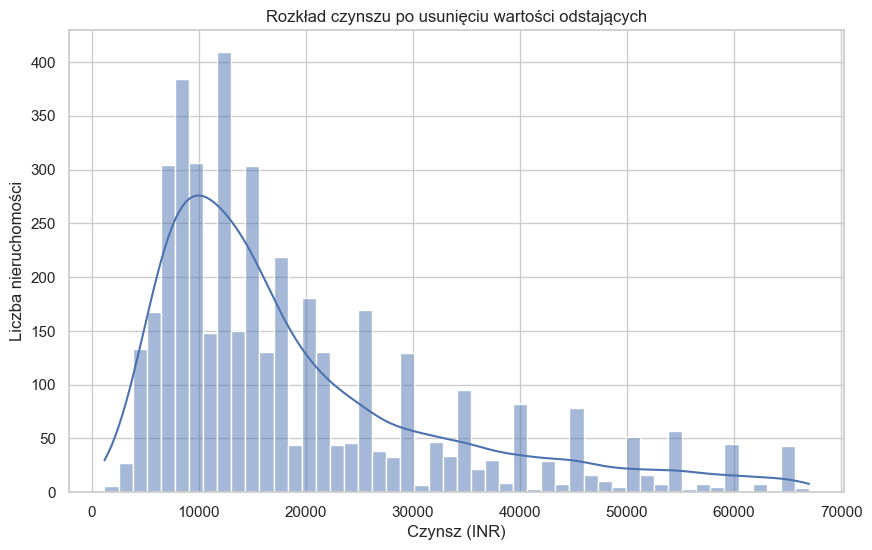

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers['Rent'], bins=50, kde=True)
plt.title('Rozkład czynszu po usunięciu wartości odstających')
plt.xlabel('Czynsz (INR)')
plt.ylabel('Liczba nieruchomości')
plt.show()

Obserwacja: Po usunięciu wartości odstających rozkład czynszu stał się bardziej skupiony i przypomina rozkład prawoskośny. Większość nieruchomości ma czynsz w przedziale 10,000–20,000 INR, z wyraźnym szczytem około 15,000 INR. Wartości powyżej 30,000 INR są mniej liczne, co wskazuje, że usunięcie wartości odstających skutecznie zredukowało wpływ rzadkich, ekstremalnych czynszów na analizę. Rozkład po czyszczeniu jest bardziej reprezentatywny dla głównej populacji danych.

Zapisanie danych po usunięciu zmiennych odstających

In [ ]:
# Zapisanie oczyszczonego zbioru danych do pliku CSV
df_no_outliers.to_csv('data/cleaned_data_no_outliers.csv', index=False)